In [20]:
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [23]:
df = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\CO2_mm_mlo.csv")

In [24]:
df.head()

,Year,Month,Decimal_date,Average,Interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [26]:
df['Date'] = pd.to_datetime({'year':df['Year'], 'month':df['Month'], 'day':1})

In [27]:
df.head()

,Year,Month,Decimal_date,Average,Interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [28]:
# The missing values have been interpolated already. But, lets drop this column and interpolate missing values by self.

df.drop(['Interpolated','Year','Month','Decimal_date'], axis='columns', inplace=True)

In [31]:
df.set_index('Date', inplace=True)

In [32]:
df.index.freq = "MS"

In [33]:
df[df['Average'].isna()]

,Average
Date,
1958-06-01,NaN
1958-10-01,NaN
1964-02-01,NaN
1964-03-01,NaN
1964-04-01,NaN
1975-12-01,NaN
1984-04-01,NaN


In [34]:
df.head()

,Average
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,NaN
1958-07-01,315.86


In [35]:
df.tail()

,Average
Date,
2019-09-01,408.54
2019-10-01,408.53
2019-11-01,410.27
2019-12-01,411.76
2020-01-01,413.40


In [36]:
len(df)

743

In [46]:
dates = pd.date_range('1958-03-01','2020-01-01',freq='MS')
len(dates)

743

In [47]:
# Since, len(dates) == len(df), that means there is no gap between dates in dataset.

##### Lets try and interpolate the NAN values of 'Average' column:

In [48]:
df['Average'].interpolate(method='time', inplace=True)

In [49]:
df.head()

,Average
Date,
1958-03-01,315.710000
1958-04-01,317.450000
1958-05-01,317.500000
1958-06-01,316.666557
1958-07-01,315.860000


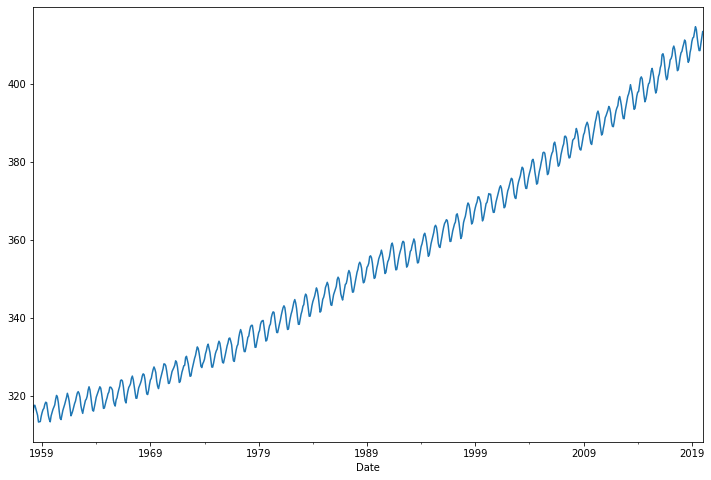

In [52]:
df['Average'].plot(figsize=(12,8))

In [53]:
result = seasonal_decompose(df['Average'])

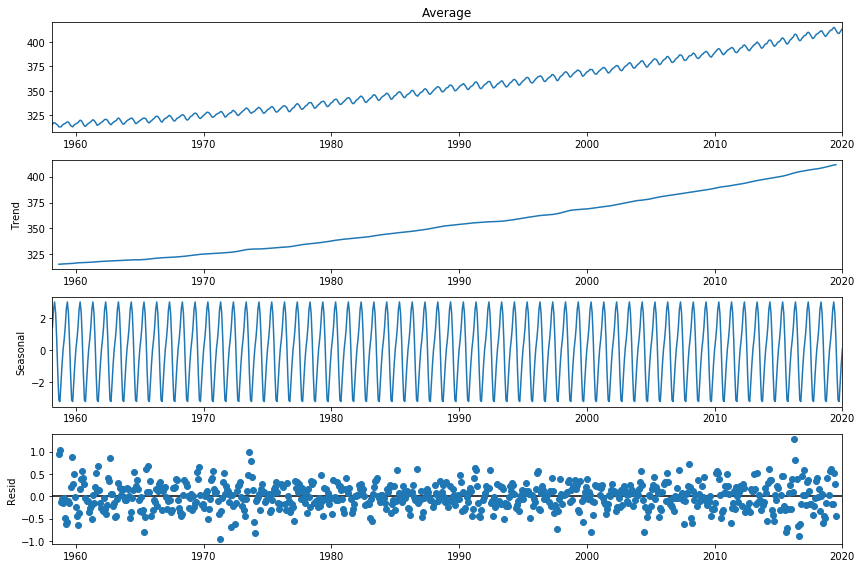

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

result.plot();

In [60]:
stepwise_fit = auto_arima(df['Average'],seasonal=True,m=12, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 12) (constant=True); AIC=533.742, BIC=570.617, Time=5.630 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=2417.249, BIC=2426.468, Time=0.018 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=837.489, BIC=855.926, Time=1.536 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=1652.730, BIC=1671.167, Time=1.199 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=2423.698, BIC=2428.308, Time=0.016 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 1, 12) (constant=True); AIC=1130.524, BIC=1162.790, Time=4.759 seconds
Fit ARIMA: (2, 1, 2)x(1, 0, 0, 12) (constant=True); AIC=801.557, BIC=833.822, Time=5.873 seconds
Fit ARIMA: (2, 1, 2)x(2, 0, 1, 12) (constant=True); AIC=493.480, BIC=534.964, Time=20.330 seconds
Fit ARIMA: (

In [61]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  743
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -219.740
Date:                            Thu, 20 Feb 2020   AIC                            455.480
Time:                                    00:21:29   BIC                            492.354
Sample:                                         0   HQIC                           469.695
                                            - 743                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.341e-05      0.000      0.408      0.683      -0.000       0.001
ma.L1         -0.3617      0.035    -10.366      0.000      -0.430      -0.293
ma.L2         -0.0737      0.027     -2.703      0.007      -0.127      -0.020
ar.S.L12       0.0332      0.041      0.819      0.413      -0.046       0.113
ar.S.L24       0.9661      0.041     23.815      0.000       0.887       1.046
ma.S.L12       0.1234      0.046      2.681      0.007       0.033       0.214
ma.S.L24      -0.8542      0.043    -20.055      0.000      -0.938      -0.771
sigma2         0.0979      0.005     20.210      0.000       0.088       0.107
===================================================================================
Ljung-Box (Q):                       50.62   Jarque-Bera (JB):                 3.89
Prob(Q):                              0.12   Prob(JB):                         0.14
Heteroskedasticity (H):               1.07   Skew:                            -0.02
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# auto_arima suggests (p,d,q) as (0,1,2) and (P,D,Q) as (2,0,2,12)

In [63]:
len(df)

743

In [64]:
train = df.iloc[:717]
test = df.iloc[717:]

In [101]:
model = SARIMAX(train['Average'],order=(0,1,2),seasonal_order=(2,0,2,12), enforce_invertibility=False)

In [102]:
results = model.fit()

In [103]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Average   No. Observations:                  717
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -212.494
Date:                            Thu, 20 Feb 2020   AIC                            438.988
Time:                                    20:12:04   BIC                            471.004
Sample:                                03-01-1958   HQIC                           451.351
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3559      0.036     -9.879      0.000      -0.427      -0.285
ma.L2         -0.0692      0.034     -2.012      0.044      -0.137      -0.002
ar.S.L12       0.6882      0.363      1.898      0.058      -0.023       1.399
ar.S.L24       0.3113      0.363      0.859      0.391      -0.399       1.022
ma.S.L12      -0.5496      0.362     -1.517      0.129      -1.260       0.160
ma.S.L24      -0.2748      0.315     -0.874      0.382      -0.892       0.342
sigma2         0.0980      0.005     20.192      0.000       0.088       0.108
===================================================================================
Ljung-Box (Q):                       55.48   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.05   Prob(JB):                         0.12
Heteroskedasticity (H):               1.06   Skew:                            -0.00
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
start = len(train)
end = len(train) + len(test) - 1

predicted = results.predict(start=start, end=end, typ='levels').rename('Test predictions')

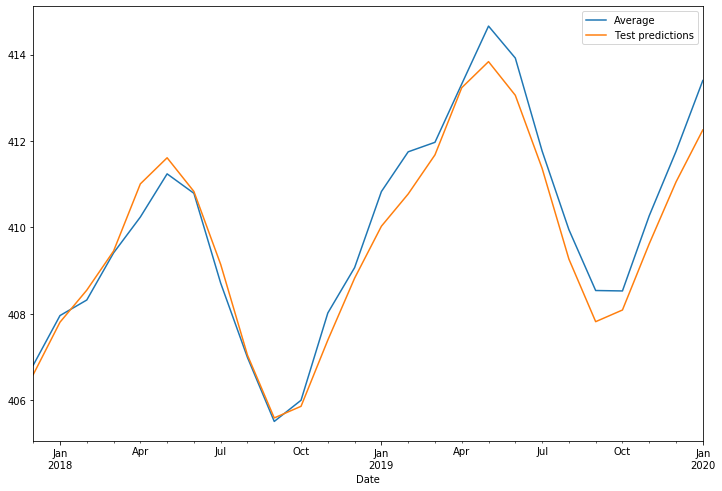

In [105]:
test['Average'].plot(legend=True, figsize=(12,8))
predicted.plot(legend= True)

In [106]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Average'], predicted))
rmse

0.561678539571185

In [107]:
test['Average'].mean()

409.99000000000007

In [108]:
predicted.mean()

409.6843859565985

## Forecasting into the future:

In [78]:
## For this we will be training the model on full dataset:

model = SARIMAX(df['Average'],order=(0,1,2),seasonal_order=(2,0,2,12))

In [79]:
results = model.fit()

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Average   No. Observations:                  743
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -219.860
Date:                            Thu, 20 Feb 2020   AIC                            453.720
Time:                                    00:54:25   BIC                            485.986
Sample:                                03-01-1958   HQIC                           466.159
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3618      0.034    -10.568      0.000      -0.429      -0.295
ma.L2         -0.0731      0.024     -3.021      0.003      -0.120      -0.026
ar.S.L12       0.0332      0.020      1.663      0.096      -0.006       0.072
ar.S.L24       0.9661      0.020     48.434      0.000       0.927       1.005
ma.S.L12       0.1260      0.033      3.853      0.000       0.062       0.190
ma.S.L24      -0.8574      0.030    -28.582      0.000      -0.916      -0.799
sigma2         0.0977      0.005     20.048      0.000       0.088       0.107
===================================================================================
Ljung-Box (Q):                       50.69   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.12   Prob(JB):                         0.14
Heteroskedasticity (H):               1.07   Skew:                            -0.02
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
## So, our model on full dataset is ready.

In [82]:
## Now we will make predictions for next 12 months:

final_pred = results.predict(start = len(df), end = len(df)+11,typ='levels').rename('Future Predictions')

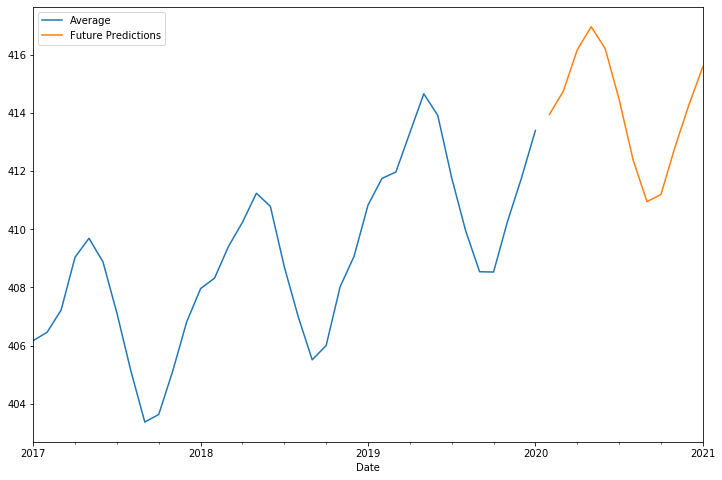

In [89]:
df['Average']['2017-01-01':].plot(legend=True, figsize=(12,8))
final_pred.plot(legend=True)